In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Read the CSV file.

In [5]:
df = pd.read_csv('tv_shows.csv', index_col = 0)

In [6]:
df.head(20)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
5,The Office,2005,16+,8.9,81%,1,0,0,0,1
6,Black Mirror,2011,18+,8.8,83%,1,0,0,0,1
7,Supernatural,2005,16+,8.4,93%,1,0,0,0,1
8,Peaky Blinders,2013,18+,8.8,92%,1,0,0,0,1
9,Avatar: The Last Airbender,2005,7+,9.2,100%,1,0,0,0,1


#Checking the total null values in the dataset

In [7]:
df[df['type']==0].sum()

Title              0.0
Year               0.0
Age                0.0
IMDb               0.0
Rotten Tomatoes    0.0
Netflix            0.0
Hulu               0.0
Prime Video        0.0
Disney+            0.0
type               0.0
dtype: float64

In [8]:
del df['type']

In [9]:
df.isnull().sum()

Title                 0
Year                  0
Age                2446
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
dtype: int64

In [10]:
df.shape

(5611, 9)

Removed 'Rotten Tomatoes' column as it had too many unknown values which cannot be replaced

In [11]:
df.drop('Rotten Tomatoes', axis = 1,inplace=True)

In [12]:
df.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,1,0,0,0
1,Stranger Things,2016,16+,8.8,1,0,0,0
2,Money Heist,2017,18+,8.4,1,0,0,0
3,Sherlock,2010,16+,9.1,1,0,0,0
4,Better Call Saul,2015,18+,8.7,1,0,0,0


In [13]:
df.isnull().sum()

Title             0
Year              0
Age            2446
IMDb           1161
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
dtype: int64

Replaced the null Age column values with 'All'

In [14]:
df['Age'].fillna('All',inplace=True)

In [15]:
df['Age'].isnull().sum()

0

Sorting the IMDb values in Descending order from highest rated to lowest rated

In [16]:
Imdb_sort = df.sort_values('IMDb', ascending=False)

In [17]:
Imdb_sort.head(10)

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+
3023,Destiny,2014,All,9.6,0,1,0,0
0,Breaking Bad,2008,18+,9.5,1,0,0,0
3747,Malgudi Days,1987,all,9.5,0,0,1,0
3177,Hungry Henry,2014,All,9.5,0,1,0,0
3567,Band of Brothers,2001,18+,9.4,0,0,1,0
2365,The Joy of Painting,1983,all,9.4,0,1,1,0
4128,Green Paradise,2011,all,9.3,0,0,1,0
91,Our Planet,2019,7+,9.3,1,0,0,0
3566,The Wire,2002,18+,9.3,0,0,1,0
325,Ramayan,1987,all,9.3,1,0,0,0


In [18]:
df.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,18+,9.5,1,0,0,0
1,Stranger Things,2016,16+,8.8,1,0,0,0
2,Money Heist,2017,18+,8.4,1,0,0,0
3,Sherlock,2010,16+,9.1,1,0,0,0
4,Better Call Saul,2015,18+,8.7,1,0,0,0


Find total TV_shows in each platform

In [19]:
df_sum= df.sum()
df1 = (df_sum["Netflix":"Disney+"])

In [20]:
df1

Netflix        1931
Hulu           1754
Prime Video    2144
Disney+         180
dtype: object

Created a pie chart using Matplotlib to showcase total shows in each platform

Text(0, 0.5, '')

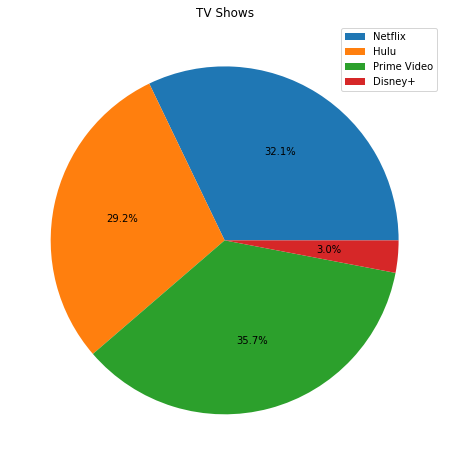

In [21]:
labels = ["Netflix","Hulu","Prime Video","Disney+"]

df1.plot.pie( figsize=(8,8),autopct='%1.1f%%',labels=None,legend=True)
plt.title('TV Shows')
plt.ylabel("")

Created a Heatmap for the TV show platforms

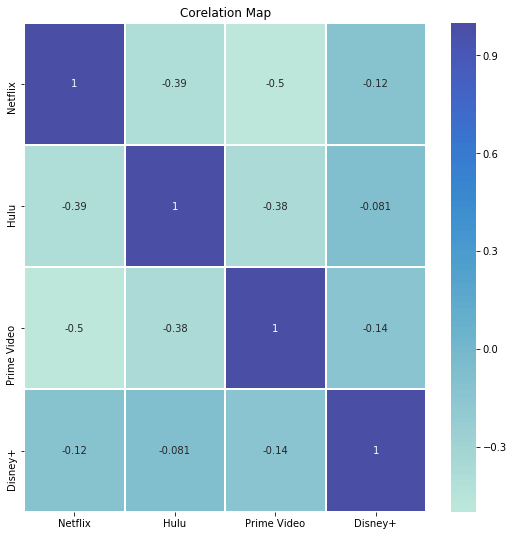

In [22]:
corr = df[["Netflix","Hulu","Prime Video","Disney+"]]
plt.figure(figsize=[9,9])
plt.title('Corelation Map')
ax = sns.heatmap(corr.corr(),linewidth=1,annot=True,center=2)

To showcase all tv shows in different age groups

In [94]:
Age_1 = df.groupby('Age').groups

Age_1 = df.groupby('Age').sum()
Age_1[["Netflix","Hulu","Prime Video","Disney+"]]


,Netflix,Hulu,Prime Video,Disney+
Age,,,,
13+,3,0,1,0
16+,398,514,209,3
18+,359,239,182,0
7+,300,365,224,66
All,700,477,1336,30
all,171,159,192,81


In [99]:
df.replace(to_replace ="all", 
                 value ="All", inplace=True) 

In [100]:
Age_1 = df.groupby('Age').groups

Age_1 = df.groupby('Age').sum()
Age_1[["Netflix","Hulu","Prime Video","Disney+"]]


,Netflix,Hulu,Prime Video,Disney+
Age,,,,
13+,3,0,1,0
16+,398,514,209,3
18+,359,239,182,0
7+,300,365,224,66
All,871,636,1528,111


Catplot to show case TV shows in different age groups

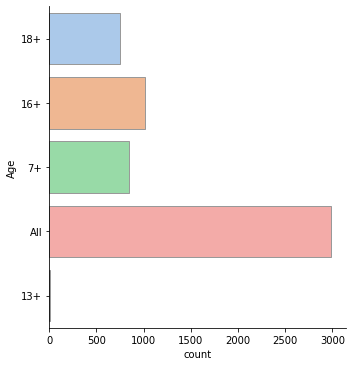

In [112]:
sns.catplot(y = 'Age', kind='count' , palette = 'pastel', edgecolor = ".6", data=df)

In [103]:
df['Age'].value_counts()

All    2991
16+    1018
7+      848
18+     750
13+       4
Name: Age, dtype: int64

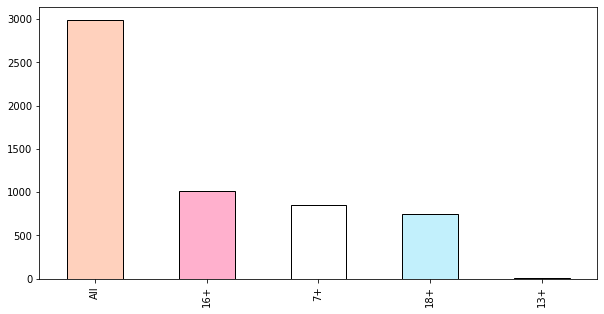

In [111]:
plt.figure(figsize=[10,5])
df['Age'].value_counts().plot.bar(color= ['#ffd1bd','#ffb0cd','#ffffff','#c2f0fc','#dbc6eb'], ec='black')

In [119]:
df['Netflix'].sum()

1931

Text(0.5, 0, '')

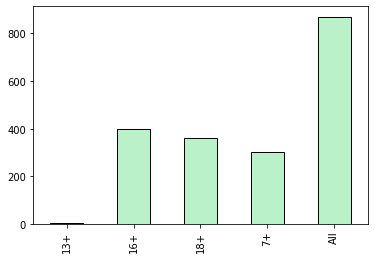

In [129]:
Age_1['Netflix'].plot.bar(color='#bbf1c8', ec='black')
plt.xlabel("")

Text(0.5, 0, '')

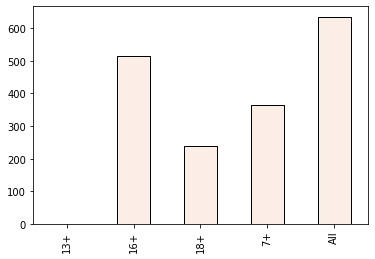

In [130]:
Age_1['Hulu'].plot.bar(color='#faeee7', ec='black')
plt.xlabel("")

plot and show different Shows and movies in every Year

<Figure size 1800x1440 with 0 Axes>

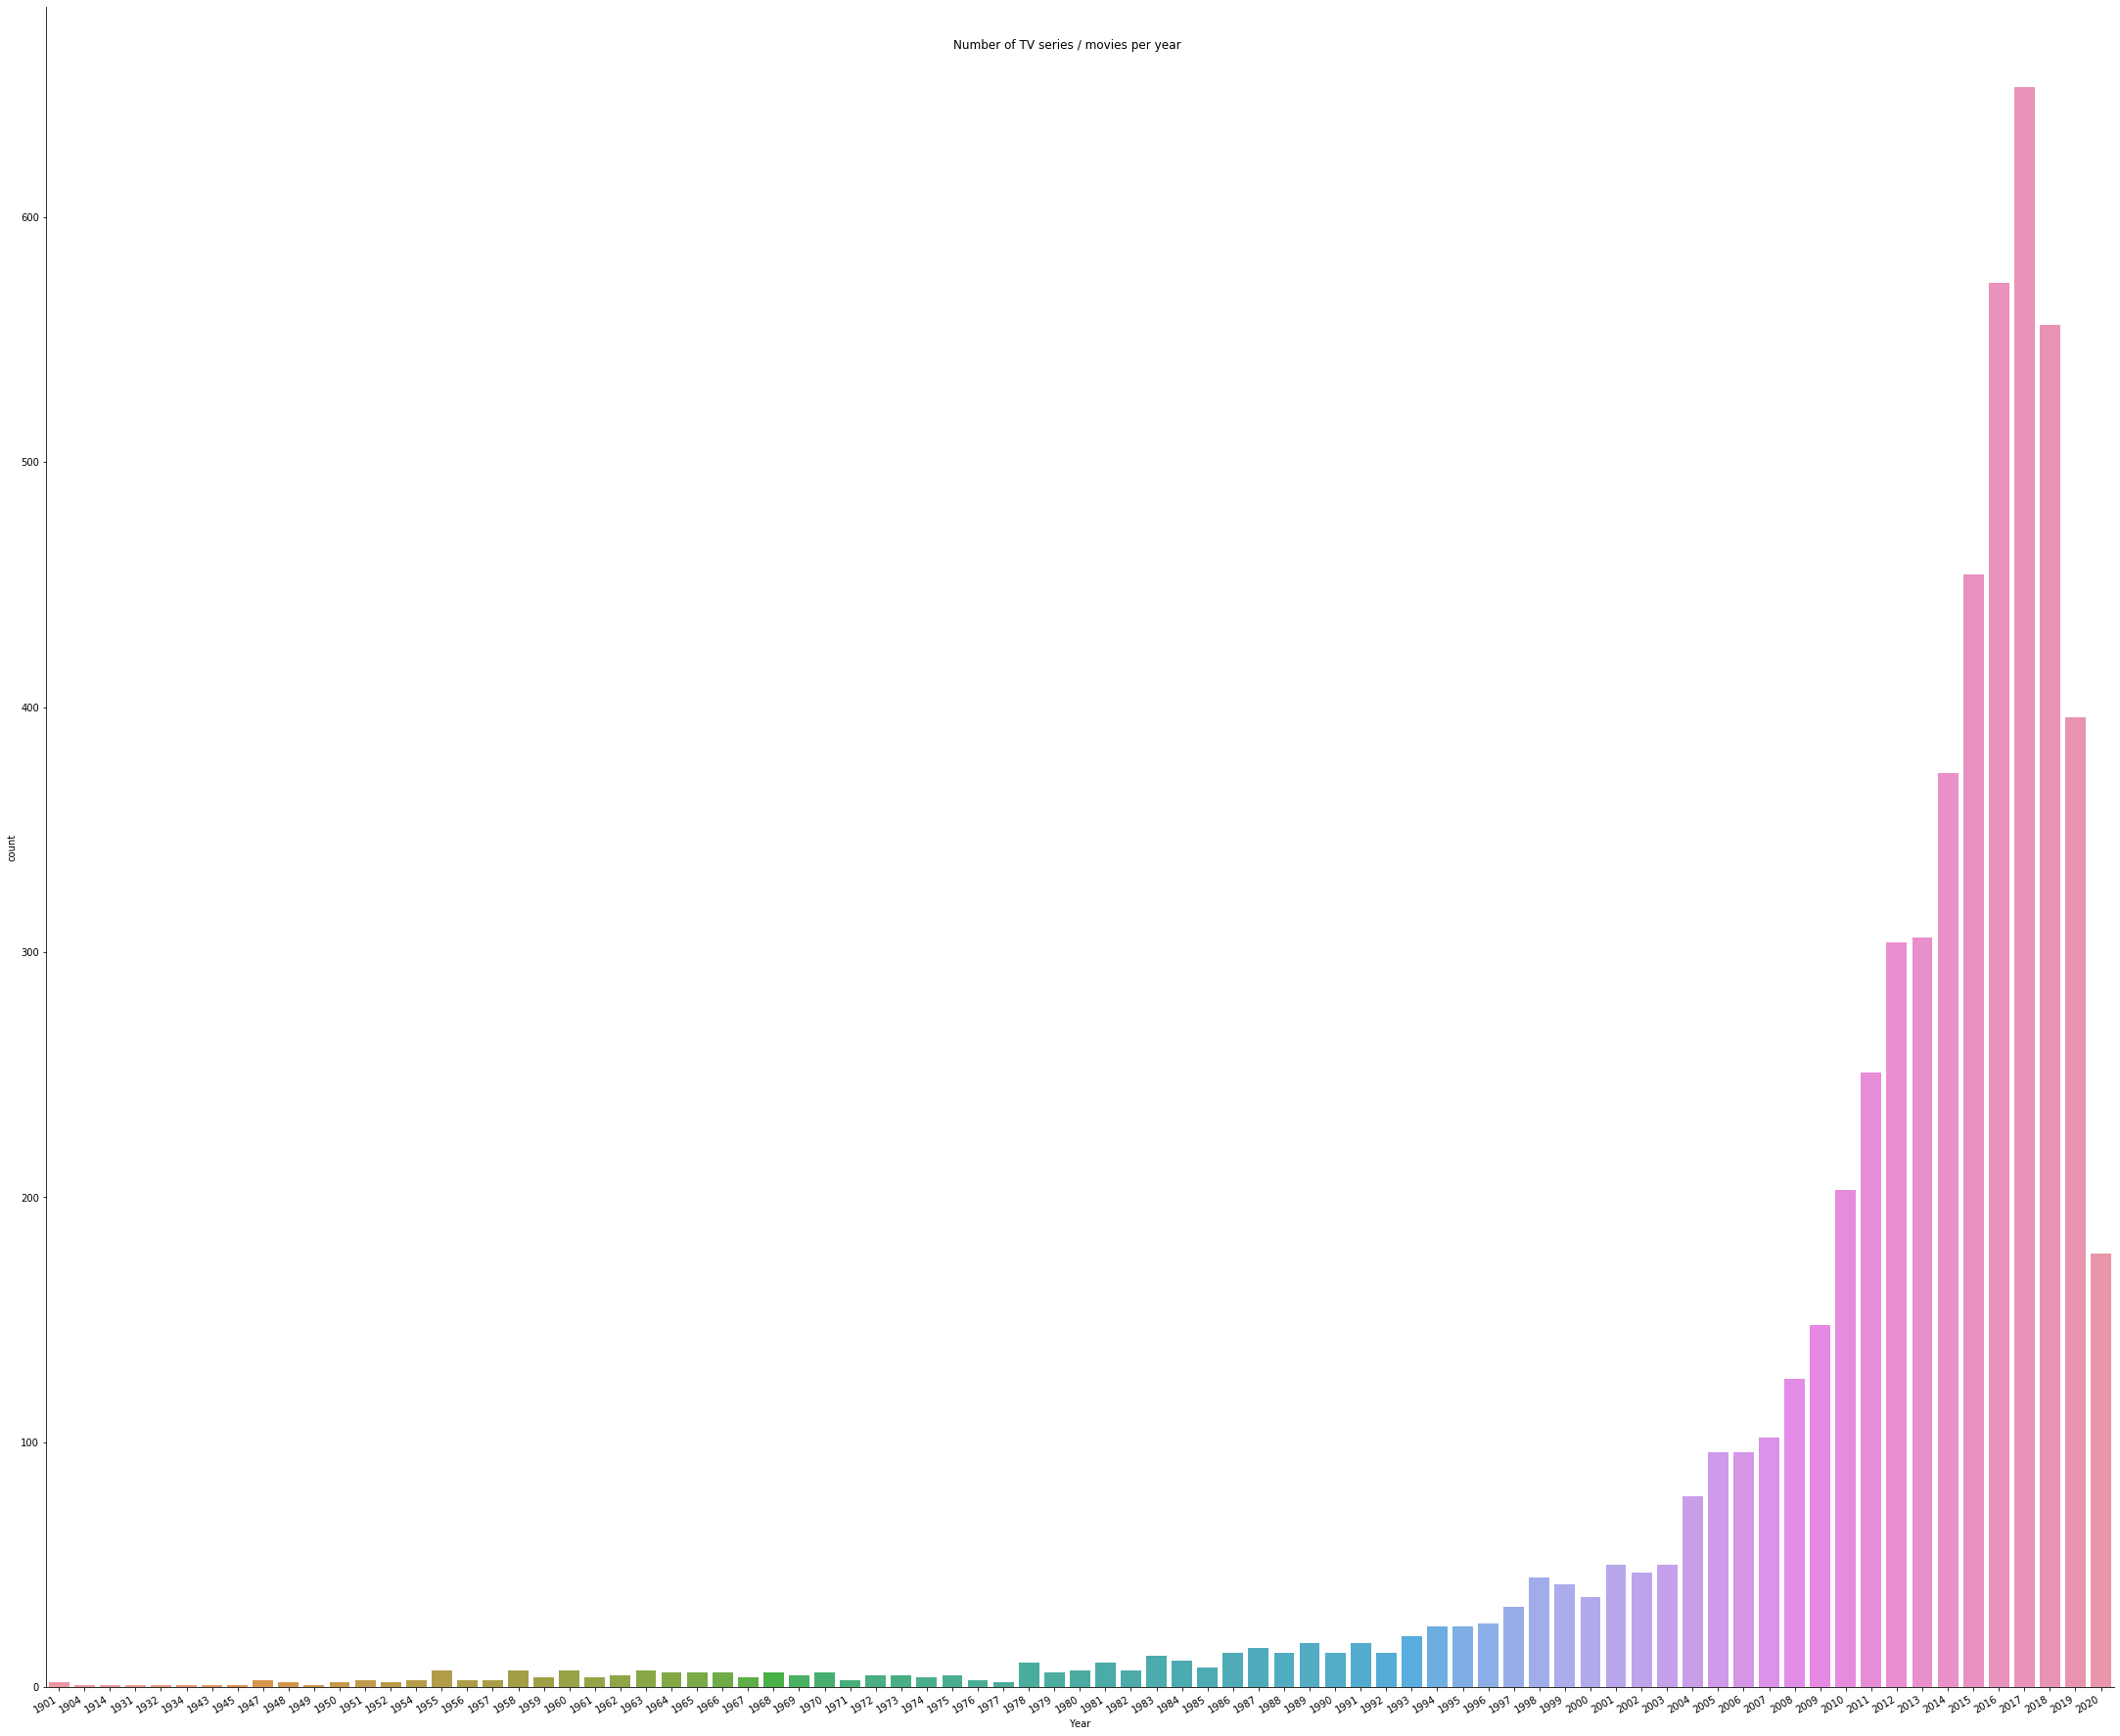

In [135]:
plt.figure(figsize=[25,20])
ax = sns.catplot(x='Year',kind='count',data=df,orient='h',height=30,aspect=1)
ax.fig.suptitle('Number of TV series / movies per year')
ax.fig.autofmt_xdate()

In [136]:
Year_1 = df.groupby('Year')
Year_sum = df.groupby('Year').sum()
Year_sum[["Netflix","Hulu","Prime Video","Disney+"]]

,Netflix,Hulu,Prime Video,Disney+
Year,,,,
1901,0,0,2,0
1904,0,0,1,0
1914,1,0,0,0
1931,0,1,0,0
1932,0,0,1,0
1934,0,1,0,0
1943,0,0,1,0
1945,0,0,1,0
1947,0,2,1,0


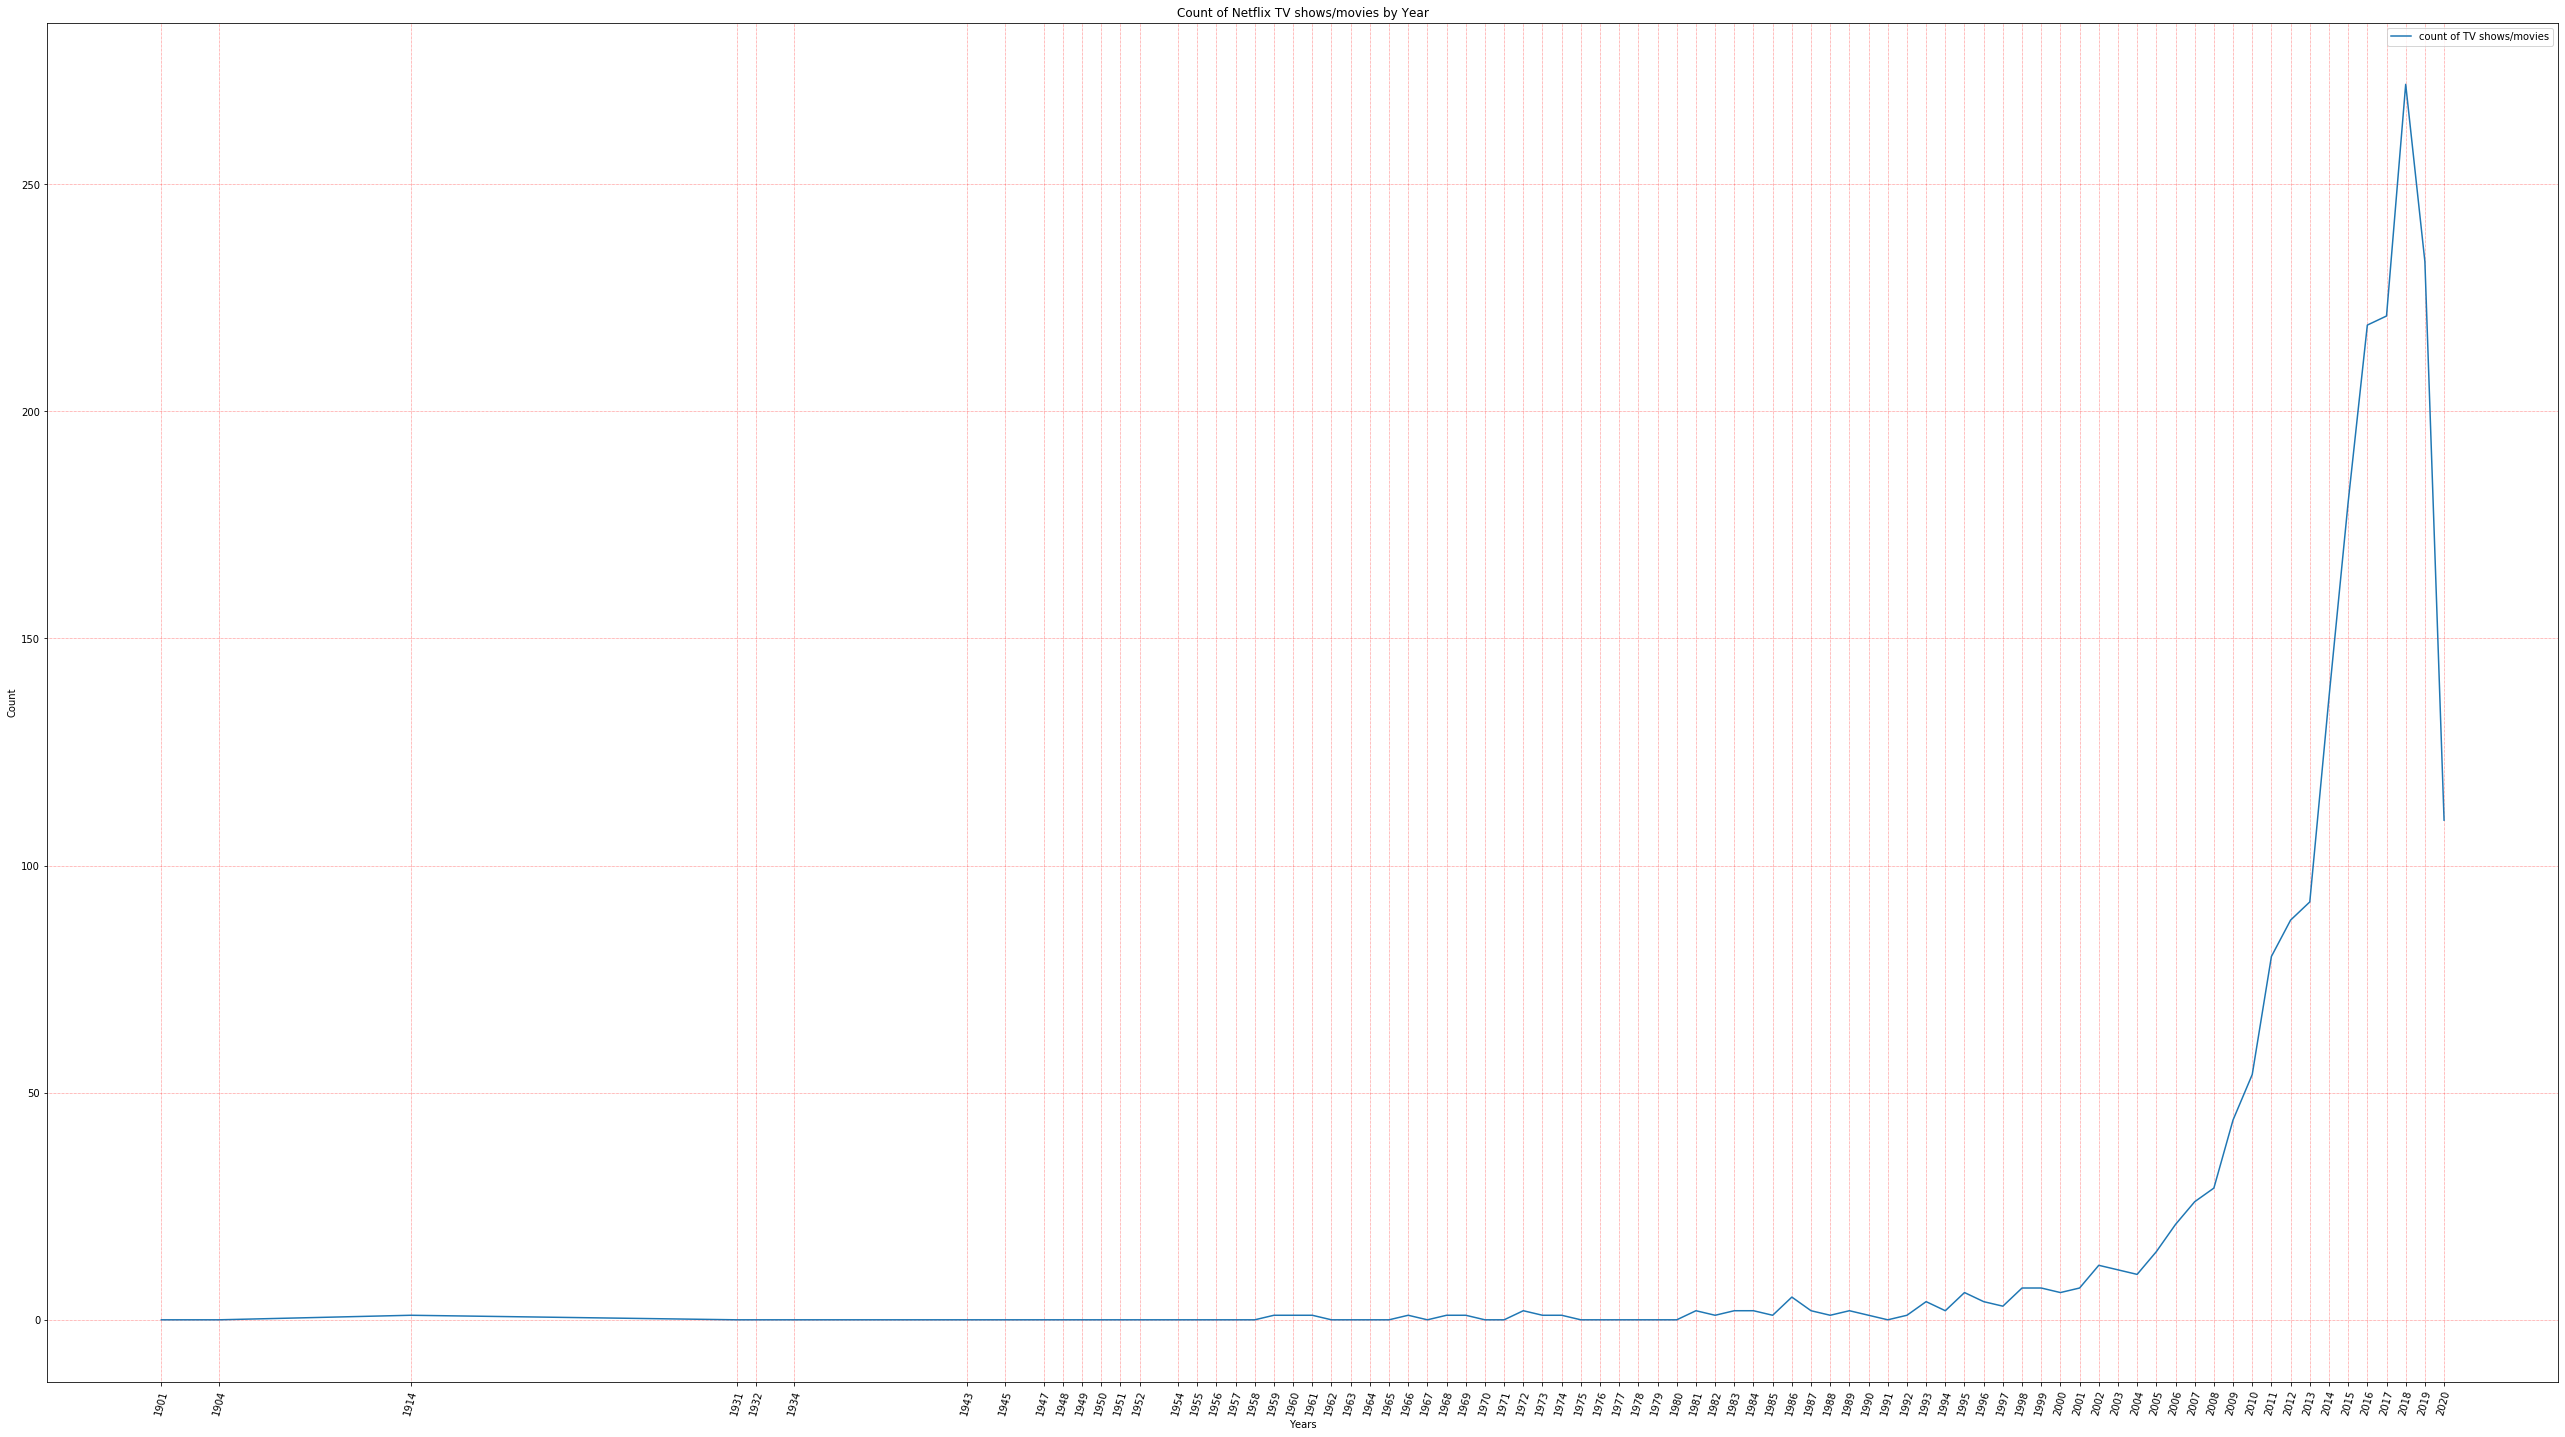

In [141]:
x = Year_sum.axes[0]
y=Year_sum['Netflix']
plt.figure(figsize=[45,25])
plt.plot(x,y,linestyle='solid', label='count of TV shows/movies')
plt.xticks(x, x, rotation=75)
plt.ylabel("Count")
plt.xlabel("Years")
plt.legend()
plt.title("Count of Netflix TV shows/movies by Year")
plt.grid(color='r', linestyle='dotted',linewidth=0.5)
plt.show()